# [IAPR 2020:][iapr2020] Lab 3 ‒  Classification

**Author:** first_name_1 last_name_1, first_name_2 last_name_2, first_name_3 last_name_3  
**Due date:** 08.05.2020

[iapr2018]: https://github.com/LTS5/iapr-2018

## Extract relevant data
We first need to extract the `lab-03-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [104]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1
In this part, we will study classification based on the data available in the Matlab file `classification.mat` that you will under `lab-03-data/part1`.
There are 3 data sets in this file, each one being a training set for a given class.
They are contained in variables `a`, `b` and `c`.

**Note**: we can load Matlab files using the [scipy.io] module.

[scipy.io]: https://docs.scipy.org/doc/scipy/reference/io.html

In [105]:
import scipy.io

data_part1_path = os.path.join(data_base_path, data_folder, 'part1', 'classification.mat')
matfile = scipy.io.loadmat(data_part1_path)
a = matfile['a']
b = matfile['b']
c = matfile['c']

print(a.shape, b.shape, c.shape)

(200, 2) (200, 2) (200, 2)


### 1.1 Bayes method
Using the Bayes method, give the analytical expression of the separation curves between those three classes.
Do reasonable hypotheses about the distributions of those classes and estimate the corresponding parameters based on the given training sets.
Draw those curves on a plot, together with the training data.
For simplicity reasons, round the estimated parameters to the closest integer value.

We suppose that the pdf follows a Gaussian law, and we suppose that the distributiof classes follows the uniform law, in other words :
\begin{equation*}
P(a)=\frac{card(a)}{(card(a)+card(b)+card(c))}
\end{equation*}
\begin{equation*}
    P(x|a)=\frac{1}{(2\pi)^\frac{1}{2}|\Sigma_a|^\frac{1}{2}}exp(-\frac{1}{2}(x-\mu_a)^T\Sigma_a^-1(x-\mu_a))
\end{equation*}



Text(0.5, 1.0, 'Plot of the three classes')

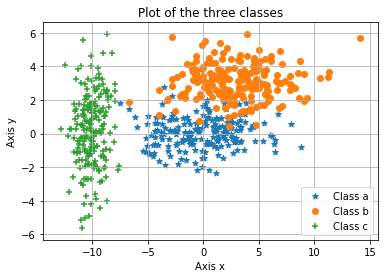

In [257]:
# Plotting the three classes on a 2D space
import matplotlib.pyplot as plt

plt.scatter(a[:,0],a[:,1],marker='*',label="Class a")
plt.scatter(b[:,0],b[:,1],marker='o',label="Class b")
plt.scatter(c[:,0],c[:,1],marker='+',label="Class c")
plt.grid()
plt.legend()
plt.xlabel("Axis x")
plt.ylabel("Axis y")
plt.title("Plot of the three classes")

In [259]:
# Building the Discrimint function
def g_di(x,mu,sigma,p):
    #x is a point, sigma (respectively mu,p) is the covariance matrix (respectively the mean, the probability) of the class
    v=np.array(x-mu)#centring x around mu
    c=-np.log(2*np.pi*np.linalg.norm(sigma))#constant the should appear in discriminant function
    sigma_inv=np.linalg.inv(sigma)#inverse of the covariance matrix
    g=-(1/2)*v.dot(sigma_inv.dot(v))+np.log(p)+c
    return(g)

In [260]:
import numpy as np
import sympy as sym

# Defining real vector
x = sym.Symbol('x')
y = sym.Symbol('y')
X = np.array([x,y])

# Mean of the two classes
mu_a=np.array([np.mean(a[0,:]),np.mean(a[1,:])])
mu_b=np.array([np.mean(b[0,:]),np.mean(b[1,:])])
mu_c=np.array([np.mean(c[0,:]),np.mean(c[1,:])])

# Probabilty of each class
p_a=len(a)/(len(a)+len(b)+len(c))
p_b=len(b)/(len(a)+len(b)+len(c))
p_c=len(c)/(len(a)+len(b)+len(c))

# Verifying if Sigma is identical for the two classes taking few points into account
Sigma_a=np.cov(a.transpose())
Sigma_b=np.cov(b.transpose())
Sigma_c=np.cov(c.transpose())

# Discriminant function of the three classes
g_a=g_di(X,mu_a,Sigma_a,p_a)
g_b=g_di(X,mu_b,Sigma_b,p_b)
g_c=g_di(X,mu_c,Sigma_c,p_c)

print("The disicriminant function of the class a: \n",g_a)
print("The disicriminant function of the class b: \n",g_b)
print("The disicriminant function of the class c: \n",g_c)


The disicriminant function of the class a: 
 -0.5*(x - 2.48007946534122)*(0.099929488488715*x - 0.0156709597012291*y - 0.258893845085676) - 0.5*(y + 0.705813358826694)*(-0.0156709597012291*x + 1.19388866276494*y + 0.881527792488439) - 5.24550211761812
The disicriminant function of the class b: 
 -0.5*(x - 0.229102757687433)*(0.0986156343917377*x - 0.0163968575498282*y + 0.0180488208970604) - 0.5*(y - 2.47864168873804)*(-0.0163968575498282*x + 0.925232300357835*y - 2.28956278615185) - 5.26192436616833
The disicriminant function of the class c: 
 -0.5*(x + 4.39964427757011)*(1.04338818045364*x - 0.0521034383560349*y + 4.40264729175552) - 0.5*(y + 3.60608726774864)*(-0.0521034383560349*x + 0.215478226088591*y + 0.547796693170276) - 4.50680171806244


In [302]:
# Define Dicriminant function of each class
def func_a(X):
    x=X[0]
    y=X[1]
    return(-0.5*(x - 2.48007946534122)*(0.099929488488715*x - 0.0156709597012291*y - 0.258893845085676) 
           - 0.5*(y + 0.705813358826694)*(-0.0156709597012291*x + 1.19388866276494*y + 0.881527792488439)
           - 5.24550211761812)
def func_b(X):
    x=X[0]
    y=X[1]
    return(-0.5*(x - 0.229102757687433)*(0.0986156343917377*x - 0.0163968575498282*y + 0.0180488208970604) - 0.5*
           (y - 2.47864168873804)*(-0.0163968575498282*x + 0.925232300357835*y - 2.28956278615185) - 5.26192436616833)
def func_c(X):
    x=X[0]
    y=X[1]
    return(-0.5*(x + 4.39964427757011)*(1.04338818045364*x - 0.0521034383560349*y + 4.40264729175552) 
           - 0.5*(y + 3.60608726774864)*(-0.0521034383560349*x + 0.215478226088591*y + 0.547796693170276)
           - 4.50680171806244)

The new size of a classified is :
 (197, 2)
The new size of b classified is :
 (357, 2)
The new size of c classified is :
 (46, 2)


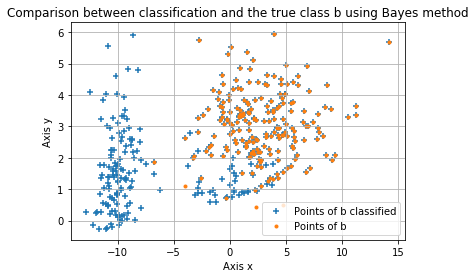

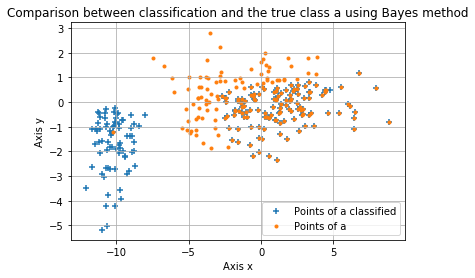

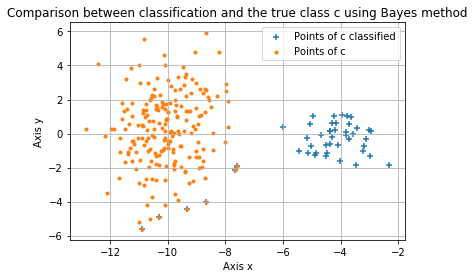

In [326]:
# list which will contains the border that entoure each class
a_new=[]
b_new=[]
c_new=[]

for k in range(len(a)):
    xa,xb,xc=list(a[k]),list(b[k]),list(c[k])
    
    if func_c(xa)==max(func_c(xa),func_b(xa),func_a(xa)):
        c_new.append(xa)
    elif func_b(xa)==max(func_c(xa),func_b(xa),func_a(xa)):
        b_new.append(xa)
    elif func_a(xa)==max(func_c(xa),func_b(xa),func_a(xa)):
        a_new.append(xa)
        
    if func_c(xc)==max(func_c(xc),func_b(xc),func_a(xc)):
        c_new.append(xc)
    elif func_b(xc)==max(func_c(xc),func_b(xc),func_a(xc)):
        b_new.append(xc)
    elif func_a(xc)==max(func_c(xc),func_b(xc),func_a(xc)):
        a_new.append(xc)
    
    if func_c(xb)==max(func_c(xb),func_b(xb),func_a(xb)):
        c_new.append(xb)
    elif func_b(xb)==max(func_c(xb),func_b(xb),func_a(xb)):
        b_new.append(xb)
    elif func_a(xb)==max(func_c(xb),func_b(xb),func_a(xb)):
        a_new.append(xb)
        
a_new=np.array(a_new)
b_new=np.array(b_new)
c_new=np.array(c_new)

########## Class b and classification based on Mahalanobis distance ##############
plt.figure()
plt.scatter(b_new[:,0],b_new[:,1],marker='+',label="Points of b classified")
plt.scatter(b[:,0],b[:,1],marker='.',label="Points of b")
plt.xlabel("Axis x")
plt.ylabel("Axis y")
plt.title("Comparison between classification and the true class b using Bayes method")
plt.legend()
plt.grid()

########## Class a and classification based on Mahalanobis distance ##############
plt.figure()
plt.scatter(a_new[:,0],a_new[:,1],marker='+',label="Points of a classified")
plt.scatter(a[:,0],a[:,1],marker='.',label="Points of a")
plt.xlabel("Axis x")
plt.ylabel("Axis y")
plt.grid()
plt.title("Comparison between classification and the true class a using Bayes method")
plt.legend()

########## Class c and classification based on Mahalanobis distance ##############
plt.figure()
plt.scatter(c_new[:,0],c_new[:,1],marker='+',label="Points of c classified")
plt.scatter(c[:,0],c[:,1],marker='.',label="Points of c")
plt.xlabel("Axis x")
plt.ylabel("Axis y")
plt.grid()
plt.title("Comparison between classification and the true class c using Bayes method")
plt.legend()

print("The new size of a classified is :\n",a_new.shape)
print("The new size of b classified is :\n",b_new.shape)
print("The new size of c classified is :\n",c_new.shape)

### 1.2 Mahalanobis distance
For classes `a` and `b`, give the expression of the Mahalanobis distance used to classify a point in class `a` or `b`, and verify the obtained classification, in comparison with the "complete" Bayes classification, for a few points of the plane.


In [256]:
# Mahalanobis distance power 2 we couldn't get the distance because we use symbols of x and y
def mah2(x,mu,sigma):
    v=np.array(x-mu)
    sigma_inv=np.linalg.inv(sigma)
    return(v.dot(sigma_inv.dot(v)))

The egality of the two sigmas is : False
The covarince matrix of a is :
 [[10.02769733  0.13162336]
 [ 0.13162336  0.83932673]]
The covarince matrix of b is :
 [[10.17034812  0.18023771]
 [ 0.18023771  1.0840038 ]]
The distance power 2 of class a (x - 2.48007946534122)*(0.099929488488715*x - 0.0156709597012291*y - 0.258893845085676) + (y + 0.705813358826694)*(-0.0156709597012291*x + 1.19388866276494*y + 0.881527792488439)
The distance power 2 of class b (x - 0.229102757687433)*(0.0986156343917377*x - 0.0163968575498282*y + 0.0180488208970604) + (y - 2.47864168873804)*(-0.0163968575498282*x + 0.925232300357835*y - 2.28956278615185)
The new size of a classified is :
 (197, 2)
The new size of b classified is :
 (357, 2)


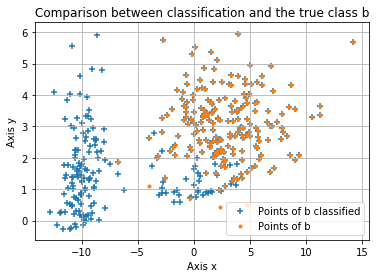

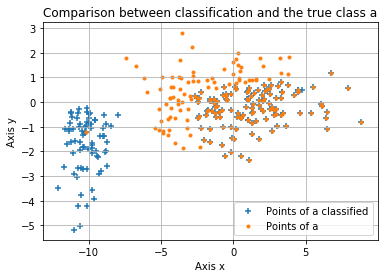

In [323]:
import scipy.spatial.distance as sd
# Mean of the two classes
mu_a=np.array([np.mean(a[0,:]),np.mean(a[1,:])])
mu_b=np.array([np.mean(b[0,:]),np.mean(b[1,:])])


# Defining real vector
x = sym.Symbol('x')
y = sym.Symbol('y')
X = np.array([x,y])

# Verifying if Sigma is identical for the two classes taking few points into account
Sigma_a=np.cov(a.transpose())
Sigma_b=np.cov(b.transpose())
print("The egality of the two sigmas is :",len(np.where((Sigma_a==Sigma_b)==False))==0)
print("The covarince matrix of a is :\n",Sigma_a)
print("The covarince matrix of b is :\n",Sigma_b)

# Mahalanobis distance power 2
d_a_mahalanobis=mah2(X,mu_a,Sigma_a)
d_b_mahalanobis=mah2(X,mu_b,Sigma_b)
print("The distance power 2 of class a",d_a_mahalanobis)
print("The distance power 2 of class b",d_b_mahalanobis)
# Lists that will contain the classified points
anew=[]
bnew=[]
for k in range(len(a)):
    x1=np.array([a[k,0],a[k,1]])
    x2=np.array([b[k,0],b[k,1]])
    # Calculating Mahalanobis distance of the first point x1
    d_a_mahalanobis1=sd.mahalanobis(x1,mu_a,Sigma_a)
    d_b_mahalanobis1=sd.mahalanobis(x1,mu_b,Sigma_b)
    # Calculating Mahalanobis distance of the first point x2
    d_a_mahalanobis2=sd.mahalanobis(x2,mu_a,Sigma_a)
    d_b_mahalanobis2=sd.mahalanobis(x2,mu_b,Sigma_b)
    # Conditions of belonging to a class
    if d_a_mahalanobis1<d_b_mahalanobis1:
        anew.append(list(x1))
    elif d_a_mahalanobis1>d_b_mahalanobis1:
        bnew.append(list(x1))
    if d_a_mahalanobis2<d_b_mahalanobis2:
        anew.append(list(x2))
    elif d_a_mahalanobis2>d_b_mahalanobis2:
        bnew.append(list(x2))
anew=np.array(a_new)
bnew=np.array(b_new)
print("The new size of a classified is :\n",anew.shape)
print("The new size of b classified is :\n",bnew.shape)

########## Class b and classification based on Mahalanobis distance ##############
plt.figure()
plt.scatter(bnew[:,0],bnew[:,1],marker='+',label="Points of b classified")
plt.scatter(b[:,0],b[:,1],marker='.',label="Points of b")
plt.xlabel("Axis x")
plt.ylabel("Axis y")
plt.title("Comparison between classification and the true class b")
plt.legend()
plt.grid()

########## Class a and classification based on Mahalanobis distance ##############
plt.figure()
plt.scatter(anew[:,0],anew[:,1],marker='+',label="Points of a classified")
plt.scatter(a[:,0],a[:,1],marker='.',label="Points of a")
plt.xlabel("Axis x")
plt.ylabel("Axis y")
plt.grid()
plt.title("Comparison between classification and the true class a")
plt.legend()



## Part 2
In this part, we aim to classify digits using the complete version of MNIST digits dataset.
The dataset consists of 60'000 training images and 10'000 test images of handwritten digits.
Each image has size 28x28, and has assigned a label from zero to nine, denoting the digits value.
Given this data, your task is to construct a Multilayer Perceptron (MLP) for supervised training and classification and evaluate it on the test images.

Download the MNIST dataset (all 4 files) from http://yann.lecun.com/exdb/mnist/ under `lab-03-data/part2`.
You can then use the script provided below to extract and load training and testing images in Python.

To create an MLP you are free to choose any library.
In case you don't have any preferences, we encourage you to use the [scikit-learn] package; it is a simple, efficient and free tool for data analysis and machine learning.
In this [link][sklearn-example], you can find a basic example to see how to create and train an MLP using [scikit-learn].
Your network should have the following properties:
* Input `x`: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
* 100 hidden units `h`.
* 10 output units `y`, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit `i`.

If you need additional examples you can borrow some code from image classification tutorials.
However, we recommend that you construct a minimal version of the network on your own to gain better insights.

[scikit-learn]: http://scikit-learn.org/stable/index.html
[sklearn-example]: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

### 2.1 Dataset loading
Here we first declare the methods `extract_data` and `extract_labels` so that we can reuse them later in the code.
Then we extract both the data and corresponding labels, and plot randomly some images and corresponding labels of the training set.

In [3]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

def extract_data(filename, image_shape, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(np.prod(image_shape) * image_number)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(image_number, image_shape[0], image_shape[1])
    return data


def extract_labels(filename, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * image_number)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [4]:
image_shape = (28, 28)
train_set_size = 60000
test_set_size = 10000

data_part2_folder = os.path.join(data_base_path, data_folder, 'part2')

train_images_path = os.path.join(data_part2_folder, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_part2_folder, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_part2_folder, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_part2_folder, 't10k-labels-idx1-ubyte.gz')

train_images = extract_data(train_images_path, image_shape, train_set_size)
test_images = extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels = extract_labels(test_labels_path, test_set_size)

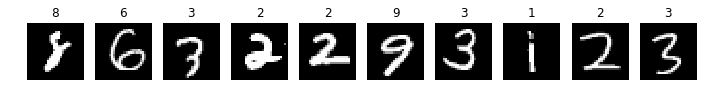

In [5]:
prng = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=train_set_size, size=10)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for ax, im, lb in zip(axes, train_images[plt_ind], train_labels[plt_ind]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(lb)

### 2.2 MLP
*Add your implementation and discussion*